In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import hdbscan

%matplotlib inline

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
from sklearn.cluster import KMeans

In [3]:
final_df = pd.read_csv("../data/processed/final_df.csv")

In [4]:
final_df.set_index('id_student', inplace=True)

In [5]:
drop_final = ["press_mod","code_presentation", "code_module"]

def drop_col (df, list):
    df.drop(columns=(list), inplace=True)
    return df

In [6]:
drop_col(final_df, drop_final)

,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region
id_student,,,,,,,,,
11391,55<=,M,HE Qualification,5,82.000000,Pass,934,240,East Anglian Region
28400,35-55,F,HE Qualification,5,66.400000,Pass,1435,60,Scotland
31604,35-55,F,A Level or Equivalent,5,76.000000,Pass,2158,60,South East Region
32885,0-35,F,Lower Than A Level,5,54.400000,Pass,1034,60,West Midlands Region
38053,35-55,M,A Level or Equivalent,5,68.000000,Pass,2445,60,Wales
...,...,...,...,...,...,...,...,...,...
2620947,0-35,F,A Level or Equivalent,9,88.888889,Distinction,476,30,Scotland
2645731,35-55,F,Lower Than A Level,9,88.111111,Distinction,893,30,East Anglian Region
2648187,0-35,F,A Level or Equivalent,9,76.666667,Pass,312,30,South Region


In [7]:
final_df

,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region
id_student,,,,,,,,,
11391,55<=,M,HE Qualification,5,82.000000,Pass,934,240,East Anglian Region
28400,35-55,F,HE Qualification,5,66.400000,Pass,1435,60,Scotland
31604,35-55,F,A Level or Equivalent,5,76.000000,Pass,2158,60,South East Region
32885,0-35,F,Lower Than A Level,5,54.400000,Pass,1034,60,West Midlands Region
38053,35-55,M,A Level or Equivalent,5,68.000000,Pass,2445,60,Wales
...,...,...,...,...,...,...,...,...,...
2620947,0-35,F,A Level or Equivalent,9,88.888889,Distinction,476,30,Scotland
2645731,35-55,F,Lower Than A Level,9,88.111111,Distinction,893,30,East Anglian Region
2648187,0-35,F,A Level or Equivalent,9,76.666667,Pass,312,30,South Region


In [7]:
final_df.isnull().sum()

age_band              0
gender                0
highest_education     0
n_assignments         0
mean_score           19
final_result          0
total_clicks          0
studied_credits       0
region                0
dtype: int64

In [8]:
final_df[final_df.isnull().any(axis=1)]

,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region
id_student,,,,,,,,,
186780,35-55,F,A Level or Equivalent,0,NaN,Withdrawn,30,120,North Western Region
549713,35-55,F,Lower Than A Level,0,NaN,Withdrawn,75,60,West Midlands Region
554393,35-55,M,A Level or Equivalent,0,NaN,Fail,21,60,West Midlands Region
606501,0-35,F,A Level or Equivalent,0,NaN,Withdrawn,9,120,West Midlands Region
654422,0-35,F,No Formal quals,0,NaN,Withdrawn,31,60,East Midlands Region
555297,0-35,M,Lower Than A Level,0,NaN,Withdrawn,155,60,North Western Region
557247,0-35,F,A Level or Equivalent,0,NaN,Withdrawn,576,60,Yorkshire Region
557247,0-35,F,A Level or Equivalent,0,NaN,Withdrawn,576,60,Yorkshire Region
427248,35-55,F,A Level or Equivalent,0,NaN,Withdrawn,317,120,North Western Region


In [9]:
#replace nan with mean value
final_df["mean_score"].fillna(72.83, inplace = True)

In [10]:
#replace "0s" with mean
final_df['n_assignments'] = np.where((final_df.n_assignments == 0), 7, final_df.n_assignments)

In [11]:
final_df['mean_score'] = np.where((final_df.mean_score == 0.0), 72.83, final_df.mean_score)

## Preprocessing

### Numeric Features

In [13]:
#num_df = pd.DataFrame(data=final_df, columns=["n_assignments", "mean_score", "total_clicks", "studied_credits"])

In [14]:
#num_df_log = np.log(num_df)


In [15]:
#num_df_log

,n_assignments,mean_score,total_clicks,studied_credits
id_student,,,,
11391,1.609438,4.406719,6.839476,5.480639
28400,1.609438,4.195697,7.268920,4.094345
31604,1.609438,4.330733,7.676937,4.094345
32885,1.609438,3.996364,6.941190,4.094345
38053,1.609438,4.219508,7.801800,4.094345
...,...,...,...,...
2620947,2.197225,4.487387,6.165418,3.401197
2645731,2.197225,4.478599,6.794587,3.401197
2648187,2.197225,4.339467,5.743003,3.401197


### Categorical Features

In [12]:
final_df['final_result'] = final_df['final_result'].apply(lambda x: str(x).replace('Distinction','4'))
final_df['final_result'] = final_df['final_result'].apply(lambda x: str(x).replace('Pass','3'))
final_df['final_result'] = final_df['final_result'].apply(lambda x: str(x).replace('Fail','2'))
final_df['final_result'] = final_df['final_result'].apply(lambda x: str(x).replace('Withdrawn','1'))

In [13]:
final_df['highest_education'] = final_df['highest_education'].apply(lambda x: str(x).replace('Post Graduate Qualification','5'))
final_df['highest_education'] = final_df['highest_education'].apply(lambda x: str(x).replace('HE Qualification','4'))
final_df['highest_education'] = final_df['highest_education'].apply(lambda x: str(x).replace('A Level or Equivalent','3'))
final_df['highest_education'] = final_df['highest_education'].apply(lambda x: str(x).replace('Lower Than A Level','2'))
final_df['highest_education'] = final_df['highest_education'].apply(lambda x: str(x).replace('No Formal quals','1'))

In [14]:
final_df['age_band'] = final_df['age_band'].apply(lambda x: str(x).replace('55<=','3'))
final_df['age_band'] = final_df['age_band'].apply(lambda x: str(x).replace('35-55','2'))
final_df['age_band'] = final_df['age_band'].apply(lambda x: str(x).replace('0-35','1'))

In [16]:
#drop_num_reg_col = ["n_assignments", "mean_score", "total_clicks", "studied_credits","region", "gender"]
#drop_col(final_df, drop_num_reg_col)

,age_band,highest_education,final_result
id_student,,,
11391,3,4,3
28400,2,4,3
31604,2,3,3
32885,1,2,3
38053,2,3,3
...,...,...,...
2620947,1,3,4
2645731,2,2,4
2648187,1,3,3


In [20]:
#final_df = pd.get_dummies(data=final_df, columns=['gender'])

In [15]:
final_df

,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region
id_student,,,,,,,,,
11391,3,M,4,5,82.000000,3,934,240,East Anglian Region
28400,2,F,4,5,66.400000,3,1435,60,Scotland
31604,2,F,3,5,76.000000,3,2158,60,South East Region
32885,1,F,2,5,54.400000,3,1034,60,West Midlands Region
38053,2,M,3,5,68.000000,3,2445,60,Wales
...,...,...,...,...,...,...,...,...,...
2620947,1,F,3,9,88.888889,4,476,30,Scotland
2645731,2,F,2,9,88.111111,4,893,30,East Anglian Region
2648187,1,F,3,9,76.666667,3,312,30,South Region


In [17]:
drop_cat = ["gender","region"]

In [18]:
drop_col(final_df, drop_cat)

,age_band,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits
id_student,,,,,,,
11391,3,4,5,82.000000,3,934,240
28400,2,4,5,66.400000,3,1435,60
31604,2,3,5,76.000000,3,2158,60
32885,1,2,5,54.400000,3,1034,60
38053,2,3,5,68.000000,3,2445,60
...,...,...,...,...,...,...,...
2620947,1,3,9,88.888889,4,476,30
2645731,2,2,9,88.111111,4,893,30
2648187,1,3,9,76.666667,3,312,30


In [23]:
final_df.dtypes

age_band              object
highest_education     object
n_assignments          int64
mean_score           float64
final_result          object
total_clicks           int64
studied_credits        int64
dtype: object

In [27]:

final_df.astype(int).dtypes

age_band             int64
highest_education    int64
n_assignments        int64
mean_score           int64
final_result         int64
total_clicks         int64
studied_credits      int64
dtype: object

In [29]:
final_df

,age_band,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits
id_student,,,,,,,
11391,3,4,5,82.000000,3,934,240
28400,2,4,5,66.400000,3,1435,60
31604,2,3,5,76.000000,3,2158,60
32885,1,2,5,54.400000,3,1034,60
38053,2,3,5,68.000000,3,2445,60
...,...,...,...,...,...,...,...
2620947,1,3,9,88.888889,4,476,30
2645731,2,2,9,88.111111,4,893,30
2648187,1,3,9,76.666667,3,312,30


In [35]:
final_df.columns

Index(['age_band', 'highest_education', 'n_assignments', 'mean_score',
       'final_result', 'total_clicks', 'studied_credits'],
      dtype='object')

In [33]:
transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])



In [36]:
FEATS = ['age_band', 'highest_education', 'n_assignments', 'mean_score',
       'final_result', 'total_clicks', 'studied_credits']
preprocessor = \
ColumnTransformer(transformers=[('num', transformer, FEATS)])

In [37]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                           

In [39]:
blind = pd.DataFrame(data=preprocessor.fit_transform(final_df))

In [40]:
blind

,0,1,2,3,4,5,6
0,3.530877,1.631764,-0.606588,0.591262,0.548775,-0.409888,4.156988
1,1.440467,1.631764,-0.606588,-0.425134,0.548775,-0.170668,-0.455321
2,1.440467,0.300150,-0.606588,0.200341,0.548775,0.174555,-0.455321
3,-0.649943,-1.031464,-0.606588,-1.206977,0.548775,-0.362140,-0.455321
4,1.440467,0.300150,-0.606588,-0.320888,0.548775,0.311593,-0.455321
...,...,...,...,...,...,...,...
26716,-0.649943,0.300150,0.274987,1.040098,1.610139,-0.628577,-1.224039
26717,1.440467,-1.031464,0.274987,0.989423,1.610139,-0.429465,-1.224039
26718,-0.649943,0.300150,0.274987,0.243776,0.548775,-0.706884,-1.224039
26719,1.440467,-1.031464,-1.267770,1.210221,-1.573954,-0.724551,-1.224039


In [22]:
#merged_df = num_df_log.merge(final_df, left_index=True, right_index=True)

In [23]:
#merged_df

,n_assignments,mean_score,total_clicks,studied_credits,age_band,highest_education,final_result,gender_F,gender_M
id_student,,,,,,,,,
6516,1.609438,4.123903,7.934155,4.094345,3,4,3,0,1
8462,1.945910,4.465908,6.486161,4.499810,3,4,1,0,1
8462,1.945910,4.465908,6.486161,4.499810,3,4,1,0,1
8462,1.945910,4.465908,6.486161,4.094345,3,4,1,0,1
8462,1.945910,4.465908,6.486161,4.094345,3,4,1,0,1
...,...,...,...,...,...,...,...,...,...
2698535,2.079442,3.669951,8.352554,4.094345,1,2,3,0,1
2698535,2.079442,3.669951,8.352554,4.094345,1,2,1,0,1
2698535,2.079442,3.669951,8.352554,4.094345,1,2,3,0,1


# UMAP

In [24]:
#full DF
merged_df_log = merged_df.to_numpy()
#cat DF
final_log_cat_np = final_df.to_numpy()
#num DF
num_df_log_np = num_df_log.to_numpy()

In [41]:
blind_np = blind.to_numpy()

##### Retry standard scaler

In [42]:
reducer = umap.UMAP(random_state=42)
reducer.fit(blind_np.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [26]:
#reducer_num = umap.UMAP(random_state=42)
#reducer_num.fit(num_df_log_np.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [43]:
embedding = reducer.transform(blind_np.data)

In [27]:
#embedding = reducer.transform(merged_df_log.data)

In [28]:
#embedding_num = reducer_num.transform(num_df_log_np.data)

In [29]:
reducer_cat = umap.UMAP(random_state=42)
reducer_cat.fit(final_log_cat_np.data)
embedding_cat = reducer_cat.transform(final_log_cat_np.data)

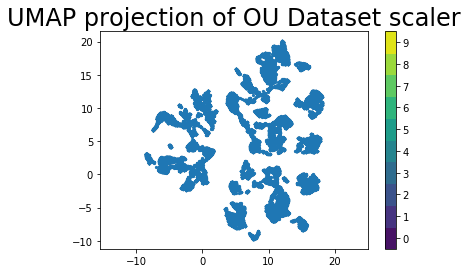

In [44]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of OU Dataset scaler', fontsize=24);

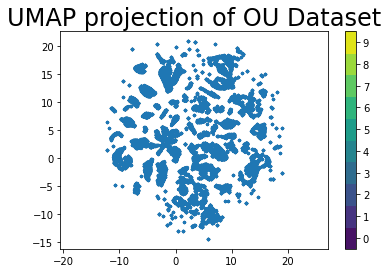

In [30]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of OU Dataset', fontsize=24);

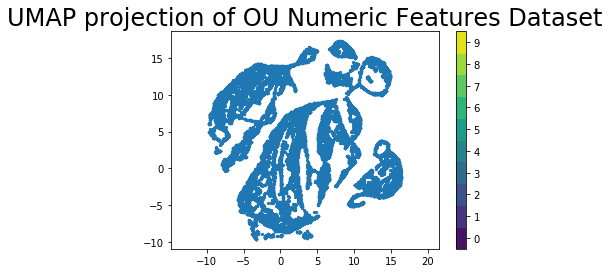

In [31]:
plt.scatter(embedding_num[:, 0], embedding_num[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of OU Numeric Features Dataset', fontsize=24);

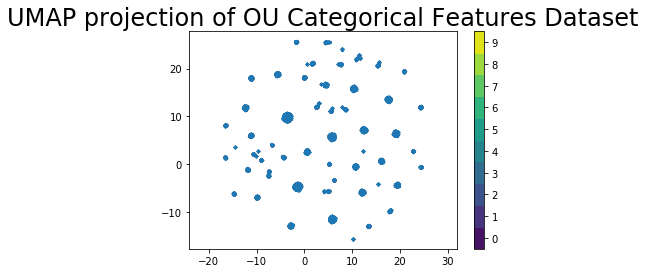

In [32]:
plt.scatter(embedding_cat[:, 0], embedding_cat[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of OU Categorical Features Dataset', fontsize=24);

# DBSCAN

In [33]:
clustering = DBSCAN().fit(embedding)

clustering

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

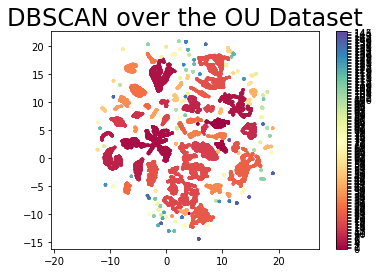

In [34]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clustering.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering.labels_))+1)-0.5).set_ticks(np.arange(len(np.unique(clustering.labels_))))
plt.title('DBSCAN over the OU Dataset', fontsize=24);

# K-MEANS

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(merged_df_log.data)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [36]:
kmeans.predict(merged_df_log.data)

array([0, 2, 2, ..., 4, 1, 1], dtype=int32)

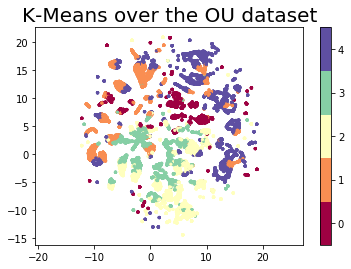

In [37]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(kmeans.n_clusters+1)-0.5).set_ticks(np.arange(kmeans.n_clusters))
plt.title('K-Means over the OU dataset', fontsize=20);

In [38]:
vle_df = pd.read_csv("../data/raw/vle.csv")

In [39]:
vle_df

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [40]:
vle_df.activity_type.unique()

array(['resource', 'oucontent', 'url', 'homepage', 'subpage', 'glossary',
       'forumng', 'oucollaborate', 'dataplus', 'quiz', 'ouelluminate',
       'sharedsubpage', 'questionnaire', 'page', 'externalquiz', 'ouwiki',
       'dualpane', 'repeatactivity', 'folder', 'htmlactivity'],
      dtype=object)